# ARIMA

The Autoregressive Integrated Moving Average (ARIMA) model combines three timeseries models: autoregression (AR), "integrated" (I) and moving-average (MA). The Autoregressive Moving Average (ARMA) model is made from a combination of just the AR and MA timeseries models, thus we will look at these two models individually first, and then combine them to form ARMA. Following that the idea of integrating/differencing a timeseries will be introduced, at which point it will be possible to discuss the full ARIMA model.

# Autoregressive Models

Autoregression is a timeseries forecasting method in which subsequent values are predicted using a linear combination of the previous values (lags) of the same time series. The "auto" comes from the fact that we are regressing a target value against itself. Autoregressive models consider a finite number, $p$, of lags known as the *order*, which are notated as an $AR(p)$ model. An autoregression model can thus be expressed as
\begin{equation}
	y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + \epsilon_t,
\end{equation}
where $y_t$ is the predicted value for the timeseries at time $t$, $\phi_i$ are the fitted lag coefficients, $\epsilon_t$ is a white noise process, and $p$ is the order of an AR model (as mentioned above). 

By considering certain special cases for the coefficients $\phi_i$, we can validate that the autogressive model can reproduce some standard timeseries processes:
- If $\phi_i = 0\ \forall\ i$, then $y_t$ is a white-noise process.
- If $\phi_1 = 1$, $\phi_i = 0\ \forall\ i \neq 1$ and $c=0$, then $y_t$ is a random walk.
- If $\phi_1 = 1$, $\phi_i = 0\ \forall\ i \neq 1$  and $c\neq0$, then $y_t$ is a random walk with drift.

### Weak Sense Stationarity Condition

Some constraints are imposed on the values for $\phi_i$ for the model to remain weak-sense stationary (causal). For example, any $AR(1)$ processes with $\lvert \phi_1 \rvert \geq 1$ is not stationary. The precise requirement is that the each complex root $z_i$ of the polynomial $1-\sum_{i=1}^p\phi_iz^i$ must satisfy $\lvert z_i \rvert > 1$. 

For AR(1) and AR(2) processes, this requirement can be written down fairly succinctly. 
- For an AR(1) process, this requirement corresponds to
\begin{equation}
\lvert \phi \rvert < 1.
\end{equation}
- For an $AR(2)$ process, the requirement is equivalent to
\begin{equation}
\phi_1 + \phi_2 < 1,\ \phi_2 - \phi_1 < 1, \qquad \textrm{and} \qquad \lvert\phi_2\rvert < 1.
\end{equation}

See P. 89 of the textbook Time series analysis and its applications: with R examples (3rd ed.) by Shumway, Robert H.; Stoffer, David for details.

### The Requirements for Autoregression

Autoregressive models assume stationarity in the underlying timeseries. Non-stationary time series exhibit changing statistical properties over time, including the mean, variance, and other moments. Applying an AR model to non-stationary data, can lead to inaccurate predictions.

### Order Selection

Since the partial autocorrelation of an $AR(p)$ process equals zero at lags larger than p, the appropriate maximum lag p is the one after which the partial autocorrelations are all zero.

### Calculation of the AR Parameters

Many ways are used to estimate the coefficients, among the most common being ordinary least squares (OLS), or the Yule-Walker equations. In particular the `statsmodels` [AutoReg model uses OLS](https://www.statsmodels.org/dev/examples/notebooks/generated/autoregressions.html).

## Moving Average Models

In time-series forecasting, a Moving Average (MA) model is a linear model used to predict future values based on past forecast errors. The notation $MA(q)$ refers to the moving average model of order $q$,
\begin{equation}
y_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q},
\end{equation}
where $\epsilon_t$ are error terms, and $\theta_1, \dots, \theta_q$ are parameters. We assume $\epsilon_t$ is a Gaussian white noise series with mean zero and variance $\sigma^2_w$.

A moving average model can be thought of a as a linear regression of the current value of the series against current and previous white noise error terms.


# The ARMA Model

Putting together the AR and MA models, with orders $p$ and $q$ respectively, we get the ARMA(p, q) model, if  the time-series is stationary, and
\begin{equation}
x_t = \epsilon_t + \sum_{i=1}^p \phi_i x_{t-i} + \sum_{j=1}^q \theta_j \epsilon_{t-j},
\end{equation}
where $\phi_1,\dots,\phi_p$ and $\theta_1,\dots,\theta_q$ are real-valued coefficients with $\phi_p \neq 0$, $\theta_q \neq 0$. The parameters p and q are called the autoregressive and the moving average orders, respectively.

## Non-Uniqueness

Consider for example, the following $ARMA(1,1)$ process,
\begin{equation}
	X_t = \theta X_{t-1} - \theta \epsilon_{t-1} + \epsilon_t.
\end{equation}
Introducing the backshift operator $B$, and with a simple rearrangement we find
\begin{equation}
	(1-\theta B) X_t = (1-\theta B) \epsilon_t.
\end{equation}
If $(1-\theta B)$ is invertible (which is true provided $\lvert \theta \rvert < 1$), and we can left-multiply by $(1-\theta B)^{-1}$ on both sides then this implies
\begin{equation}
	X_t = \epsilon_t.
\end{equation}
I.e., in this case, the process that previously seemed as if it was an $ARMA(1,1)$ process, was a simple white-noise process.

More generally, since there are two polynomials (one for $\phi$, one for $\theta$), if they have common roots they can be cancelled outside and the process can be reduced in order.

### The AR and MA Polynomials

The AR and MA polynomials are defined as,
\begin{equation}
	\phi(z) = 1 - \phi_1 z - \cdots - \phi_p z^p, \qquad \phi_p \neq 0,
\end{equation}
and
\begin{equation}
	\theta(z) = 1 + \theta_1 z + \cdots + \theta_q z^q, \qquad \phi_q \neq 0,
\end{equation}
respectively, where $z\in\mathbb{C}$.

To address the problem of non-uniqueness, we will henceforth refer to an ARMA($p,q$) model to mean that it is in it's simplest form, i.e. we require that $\phi(z)$ and $\theta(z)$ have no common factors.

# Integrated (Order of Integration)

In statistics, the [order of integration](https://en.wikipedia.org/wiki/Order_of_integration), denoted $I(d)$, of a time series is a statistic, which reports the minimum number of differences required to obtain a stationary timeseries. Differencing de-trends a time series and tends to make the mean constant. Differencing can be applied several times, but often the series is sufficiently stationary after a single differencing step.

The differencing operation can be represented as:

\begin{equation}
\Delta x_t = x_t - x_{t-1}
\end{equation}

For higher-order differencing, the notation is extended. For example, the second-order differencing is:
\begin{equation}
\Delta^2 x_t = \Delta (\Delta x_t) = (x_t - x_{t-1}) - (x_{t-1} - x_{t-2}) = x_t - 2x_{t-1} + x_{t-2}.
\end{equation}

# ARIMA

It is frequently the case that a timeseries process, $y_t$ is not ARMA($p,q$), but it is ARMA($p,q$) with a deterministic trend.

For example, consider the model
\begin{equation}
x_t = \mu_t + y_t,
\end{equation}
where $\mu_t = \beta_0 + \beta_1 t$ and $y_t$ is a stationary process. Differencing such a process leads to a stationary process, i.e.
\begin{equation}
	\nabla x_t = x_t - x_{t-1} = \beta_1 + \nabla y_t,
\end{equation}
which is a stationary ARMA process.

The integrated ARMA, or ARIMA, model is a broadening of the class of ARMA models to include differencing.

A process, $x_t$ is said to be ARIMA($p, d, q$) if
\begin{equation}
	\nabla^d x_t = (1-B)^d x_t,
\end{equation}
is ARMA($p,q$).

The model can be written neatly in terms of polynomials of backshift operators as
\begin{equation}
	\phi(B)(1-B)^d x_t = \theta(B) \epsilon_t.
\end{equation}




## Special Cases of ARIMA Models

| Description                | ARIMA Model                    |
|----------------------------|--------------------------------|
| White noise                | ARIMA(0,0,0)      |
| Random walk                | ARIMA(0,1,0) with no constant |
| Random walk with drift     | ARIMA(0,1,0) with a constant  |
| Autoregression             | ARIMA(p,0,0)      |
| Moving average             | ARIMA(0,0,q)      |


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# matplotlib settings
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 18

# Read in the data
data = pd.read_csv('../data/airline_passengers.csv')
data['Month'] = pd.to_datetime(data['Month'])

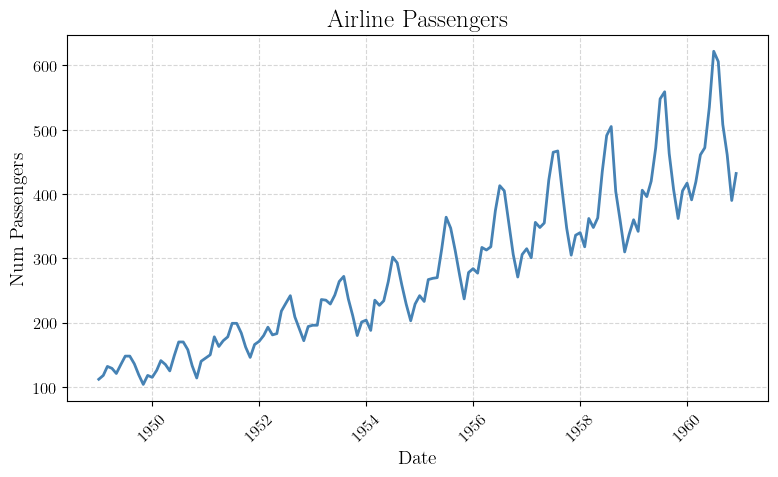

In [3]:
import matplotlib.pyplot as plt

def plot_passenger_volumes(df: pd.DataFrame, y: str) -> None:
    plt.figure(figsize=(8, 5))  
    plt.plot(df['Month'], df[y], color='steelblue', linewidth=2)

    plt.title('Airline Passengers', fontsize=18)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel(y, fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()



# Plot the airline passenger data
plot_passenger_volumes(df=data, y='Num Passengers')

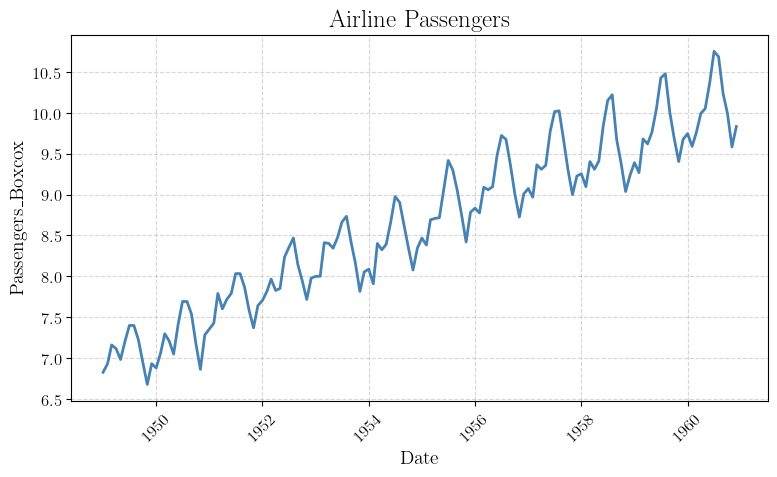

In [4]:

# Import packages
from scipy.stats import boxcox

# Make the target variance stationary
data['Passengers_Boxcox'], lam = boxcox(data['Num Passengers'])

# Plot the box-cox passenger data
plot_passenger_volumes(df=data, y='Passengers_Boxcox')

# ACF and PACF Plots

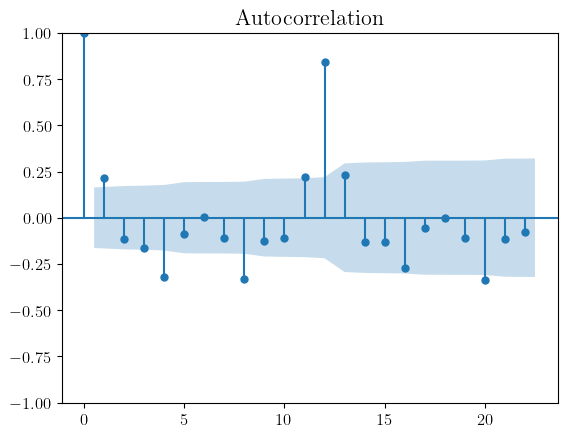

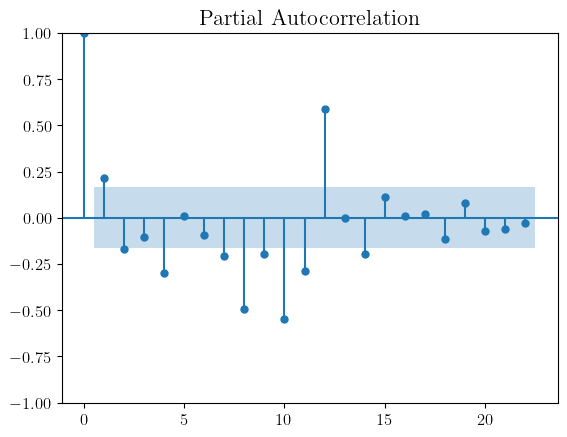

In [ ]:

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# Difference the data
data["Passenger_diff"] = data["Passengers_Boxcox"].diff()
data.dropna(inplace=True)

# Plot acf and pacf
plot_acf(data['Passenger_diff'])
plot_pacf(data['Passenger_diff'], method='ywm')
plt.show()

In [6]:
# Import packages
from statsmodels.tsa.arima.model import ARIMA
from scipy.special import inv_boxcox
import warnings

with warnings.catch_warnings():
  warnings.simplefilter("ignore")

  # Split train and test
  train = data.iloc[:-int(len(data) * 0.2)]
  test = data.iloc[-int(len(data) * 0.2):]

  # Build ARIMA model and inverse the boxcox
  model = ARIMA(train['Passengers_Boxcox'], order=(12, 1, 12)).fit()
  boxcox_forecasts = model.forecast(len(test))
  forecasts = inv_boxcox(boxcox_forecasts, lam)

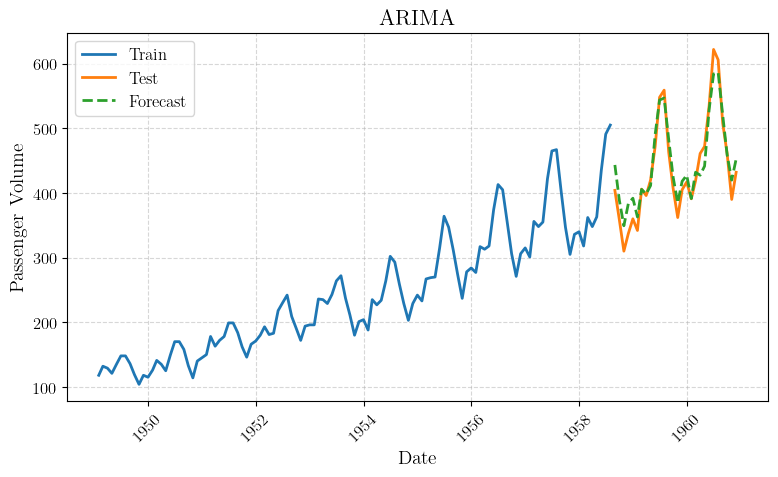

In [7]:
import matplotlib.pyplot as plt

def plot_forecasts(forecasts: list[float], title: str) -> None:
    """Matplotlib version of the forecast plot."""
    plt.figure(figsize=(8, 5))  # 650px wide ≈ 8 inches
    
    plt.plot(train['Month'], train['Num Passengers'], label='Train', linewidth=2)
    plt.plot(test['Month'], test['Num Passengers'], label='Test', linewidth=2)
    plt.plot(test['Month'], forecasts, label='Forecast', linestyle='--', linewidth=2)

    plt.title(title, fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Passenger Volume', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()



# Plot the forecasts
plot_forecasts(forecasts, 'ARIMA')

# Seasonal ARIMA (SARIMA) Models

The `S' in SARIMA stands for Seasonal, and attempts to account for seasonal trends in the ARIMA model. A $\text{SARIMA}(p, d, q)(P, D, Q)m$ model is defined as,
\begin{equation}
	y_t' = c + \sum_{n=1}^p \phi_n y'_{t-n} + \sum_{n=1}^q \theta_n \epsilon_{t-n} + \sum_{n=1}^P \eta_n y'_{t-mn} + \sum_{n=1}^Q \omega_n \epsilon_{t-mn} + \epsilon_t,
\end{equation}
where $y'$ is the differenced timeseries, both through regular differencing ($d$) and seasonal differencing ($D$), $P$ is the number of seasonal autoregressors, $\eta_1,\dots,\eta_P$ are the coefficients of the seasonal forecast errors, $Q$ is the number of seasonal moving-average components, $\omega_1,\dots,\omega_Q$ are the coefficients of the seasonal autoregressive components and $m$ is the length of the season. 

## Order Selection and Seasonal Differencing

The regular differencing order, $d$, and the seasonal differencing order, $D$, can be deduced through the Augmented Dickey-Fuller (ADF) statistical test that deduces whether a time series is stationary or not.

The autoregressive and moving-average orders, $p, q, P, Q$ can be found by analyzing the partial autocorrelation function (PACF) and autocorrelation function (ACF) respectively.

In [8]:
import pandas as pd

# Read in the data
data = pd.read_csv('../data/airline_passengers.csv')
data['Month'] = pd.to_datetime(data['Month'])

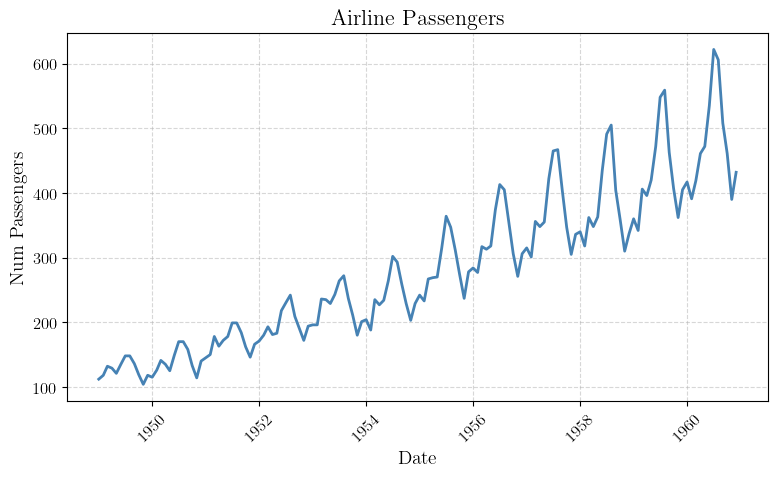

In [9]:

def plot_passenger_volumes(df: pd.DataFrame, y: str) -> None:
    """Matplotlib version of the passenger volume line plot."""
    plt.figure(figsize=(8, 5))  # ~650px wide

    plt.plot(df['Month'], df[y], color='steelblue', linewidth=2)

    plt.title('Airline Passengers', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel(y.replace('#', r'\#'), fontsize=14)  # latex-safe if using usetex
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


# Plot the airline passenger data
plot_passenger_volumes(df=data, y='Num Passengers')

Due to the obvious trend and seasonality, the mean and variance is changing over time and the data is non-stationary. Therefore we appply differencing and the Box-Cox trnasform to make our series stationary so that it will meet the requirements for modelling with SARIMA.

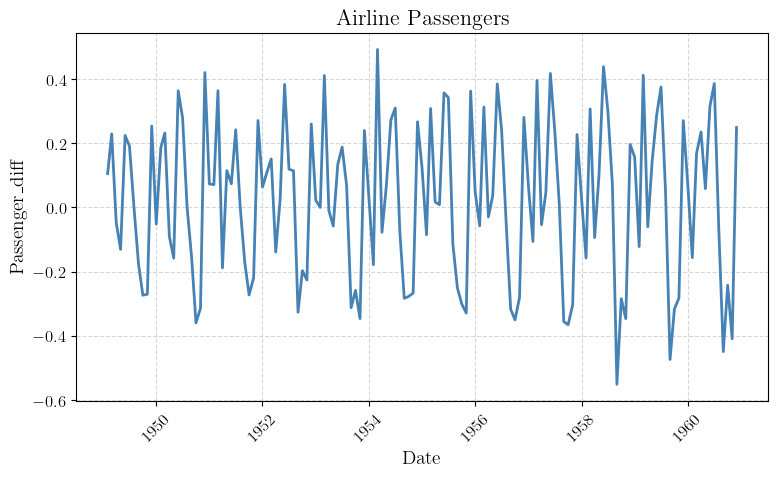

In [10]:
from scipy.stats import boxcox

# Make the data stationary
data['Passengers_Boxcox'], lam = boxcox(data['Num Passengers'])
data["Passenger_diff"] = data["Passengers_Boxcox"].diff()
data.dropna(inplace=True)

# Plot the stationary passenger data
plot_passenger_volumes(df=data, y='Passenger_diff')

In the step below, we will use the ACF and PACF correlograms to determine the orders to consider for the autoregressive and moving-average coefficients.

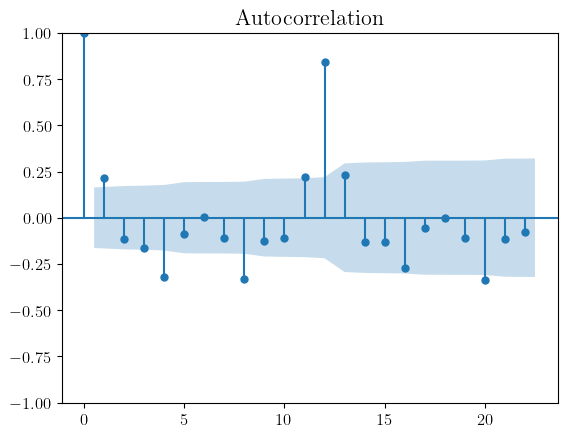

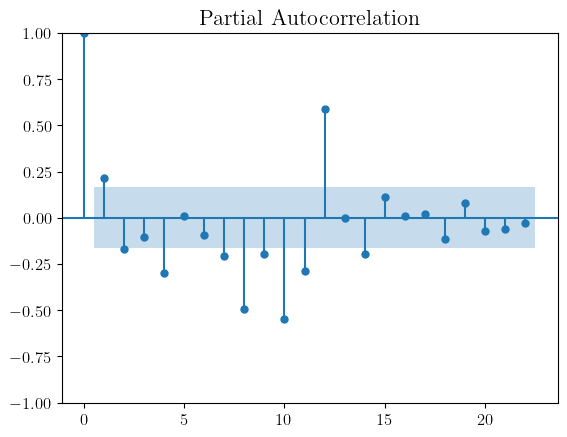

In [11]:
# Import packages
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# Plot acf and pacf
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5), dpi=80)
plot_acf(data['Passenger_diff'])
plot_pacf(data['Passenger_diff'], method='ywm')
# ax1.tick_params(axis='both', labelsize=12)
# ax2.tick_params(axis='both', labelsize=12)
plt.show()

The spike in the correlograms around 12 makes sense as our data has a clear yearly seasonality with the data specified in months.

We will perform the model fitting using the ARIMA class from `statsmodels`. Since this class performs the differencing for us, we only need to pass in the Box-Cox transformed time-series.

In [12]:
from scipy.special import inv_boxcox
from statsmodels.tsa.arima.model import ARIMA
import warnings

with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  # Split train and test
  train_test_split = int(len(data) * 0.8)
  train = data.iloc[:train_test_split]
  test = data.iloc[train_test_split:]

  # Build ARIMA model
  model = ARIMA(train['Passengers_Boxcox'], order=(10, 1, 10), seasonal_order=(1, 1, 1, 12)).fit()
  boxcox_forecasts = model.forecast(len(test))
  forecasts = inv_boxcox(boxcox_forecasts, lam)

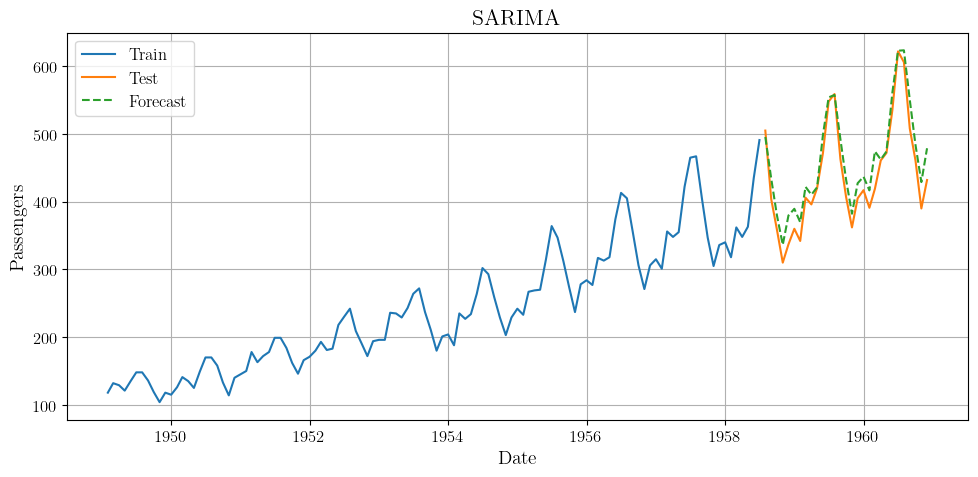

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_forecasts(train: pd.DataFrame, test: pd.DataFrame, forecasts: list[float], title: str) -> None:
    """Plot both static (matplotlib) and interactive (plotly) versions."""
    
    # --- Matplotlib (static) ---
    plt.figure(figsize=(10, 5))
    plt.plot(train['Month'], train['Num Passengers'], label='Train')
    plt.plot(test['Month'], test['Num Passengers'], label='Test')
    plt.plot(test['Month'], forecasts, label='Forecast', linestyle='--')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Passengers')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_forecasts(train, test, forecasts, 'SARIMA')

The SARIMA model has captured most of the qualitative features we would like a timeseries model to emulate and produces a reasonable forecast of the test data. One of the disadvantages of SARIMA is that it is not able to describe/capture multiple seasonalities in the same time-series.

# AutoARIMA: Automatic $p, q, d$ Selection

Above we saw how ACF and PACF plots can be used as a basis for selecting the ARIMA model parameters $p$ and $q$. This can be done automatically, however it is not built in to the `statsmodels` package. It is built in to the Python package `pmdarima`, which is based on statsmodels.